In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px

In [2]:
# Store file paths in a variable
State_file = Path("Resources/Occupational_Employment_State_2022.xlsx")
automation_file = Path("Resources/automation_data_by_state.csv")
states_file = Path("Resources/states.csv")

In [3]:
# Read the files into dataframes
Occupational_State_df = pd.read_excel(State_file)
automation_data = pd.read_csv(automation_file, encoding="ISO-8859-1")
state_codes_df = pd.read_csv(states_file, encoding="ISO-8859-1")

In [4]:
Occupational_State_df.head()

,AREA,AREA_TITLE,NAICS,NAICS_TITLE,I_GROUP,OCC_CODE,OCC_TITLE,O_GROUP,TOT_EMP,EMP_PRSE,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,00-0000,All Occupations,total,5800,0.1,...,19.75,24.3,32.61,23270,29960,41080,50540,67820,NaN,NaN
1,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,11-0000,Management Occupations,major,**,**,...,48.59,61,67.44,52390,67960,101060,126880,140270,NaN,NaN
2,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,11-1021,General and Operations Managers,detailed,150,14.3,...,48.63,61,64.78,49400,67950,101140,126880,134730,NaN,NaN
3,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,13-0000,Business and Financial Operations Occupations,major,70,43.2,...,32.85,36.05,38.23,30880,48880,68330,74980,79520,NaN,NaN
4,1,Alabama,11,"Agriculture, Forestry, Fishing and Hunting",sector,13-1020,Buyers and Purchasing Agents,detailed,**,**,...,36.05,36.05,38.23,29120,48880,74980,74980,79520,NaN,NaN


In [5]:
# Select the requred columns-'AREA_TITLE', 'OCC_CODE', 'OCC_TITLE' 'TOT_EMP'
state_filter_data = Occupational_State_df[['AREA_TITLE','OCC_CODE', 'OCC_TITLE', 'TOT_EMP']]

In [6]:
# Rename the columns
state_filter_data.rename(columns={'AREA_TITLE': 'State Name','OCC_CODE':'2022 National Employment Matrix code',
                                  'OCC_TITLE' : '2022 National Employment Matrix title',
                                  'TOT_EMP': 'Total Jobs'}, inplace=True)
state_filter_data.head()

/var/folders/qw/b7yd_mld1pz2xv1xy035n6cm0000gn/T/ipykernel_89551/934871235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_filter_data.rename(columns={'AREA_TITLE': 'State Name','OCC_CODE':'2022 National Employment Matrix code',


,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs
0,Alabama,00-0000,All Occupations,5800
1,Alabama,11-0000,Management Occupations,**
2,Alabama,11-1021,General and Operations Managers,150
3,Alabama,13-0000,Business and Financial Operations Occupations,70
4,Alabama,13-1020,Buyers and Purchasing Agents,**


In [7]:
state_filter_data_cleaned = state_filter_data[state_filter_data['Total Jobs'] != '**']
state_filter_data_cleaned.head()

,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs
0,Alabama,00-0000,All Occupations,5800
2,Alabama,11-1021,General and Operations Managers,150
3,Alabama,13-0000,Business and Financial Operations Occupations,70
5,Alabama,19-0000,"Life, Physical, and Social Science Occupations",60
6,Alabama,19-1032,Foresters,50


In [8]:
grouping_state_data = state_filter_data_cleaned.groupby(
    ['State Name','2022 National Employment Matrix code','2022 National Employment Matrix title'])['Total Jobs'].sum()
grouping_state_data_df = pd.DataFrame(grouping_state_data)
grouping_state_data_df = grouping_state_data_df.reset_index()
grouping_state_data_df.head()

,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs
0,Alabama,00-0000,All Occupations,6267830
1,Alabama,11-0000,Management Occupations,325290
2,Alabama,11-1011,Chief Executives,1400
3,Alabama,11-1021,General and Operations Managers,115870
4,Alabama,11-1031,Legislators,2790


In [9]:
grouping_state_data_df = grouping_state_data_df.merge(state_codes_df, left_on='State Name', right_on='State')
grouping_state_data_df = grouping_state_data_df[["State Name", 
                                                               "2022 National Employment Matrix code",
                                                               "2022 National Employment Matrix title",
                                                               "Total Jobs",
                                                               "Abbreviation"]]
grouping_state_data_df.rename(columns={'Abbreviation':'State Code'},inplace=True)
grouping_state_data_df.head()


,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs,State Code
0,Alabama,00-0000,All Occupations,6267830,AL
1,Alabama,11-0000,Management Occupations,325290,AL
2,Alabama,11-1011,Chief Executives,1400,AL
3,Alabama,11-1021,General and Operations Managers,115870,AL
4,Alabama,11-1031,Legislators,2790,AL


In [10]:
total_job = grouping_state_data_df.groupby(['State Name','State Code'])['Total Jobs'].sum()
total_job
total_job_df = pd.DataFrame(total_job)
max_job = total_job_df.sort_values(by= 'Total Jobs', ascending = False)
max_job.head()

,,Total Jobs
State Name,State Code,
California,CA,168114330
Texas,TX,122336580
Florida,FL,87206550
New York,NY,85670810
Illinois,IL,55037690


In [11]:
merged_df = grouping_state_data_df.merge(automation_data[['SOC','Probability']], left_on = '2022 National Employment Matrix code',
                                        right_on = 'SOC')
del merged_df['SOC'] 
merged_df.head()

,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs,State Code,Probability
0,Alabama,11-1011,Chief Executives,1400,AL,0.015
1,Alaska,11-1011,Chief Executives,1670,AK,0.015
2,Arizona,11-1011,Chief Executives,6490,AZ,0.015
3,Arkansas,11-1011,Chief Executives,6610,AR,0.015
4,California,11-1011,Chief Executives,110890,CA,0.015


In [12]:
probable_job_affected_df = merged_df.copy()
probable_job_affected_df['Probable Jobs Affected'] = probable_job_affected_df['Total Jobs']*probable_job_affected_df['Probability']
probable_job_affected_df['Probable Jobs Affected'] = probable_job_affected_df['Probable Jobs Affected'].astype('int')
probable_job_affected_df.head()

,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs,State Code,Probability,Probable Jobs Affected
0,Alabama,11-1011,Chief Executives,1400,AL,0.015,21
1,Alaska,11-1011,Chief Executives,1670,AK,0.015,25
2,Arizona,11-1011,Chief Executives,6490,AZ,0.015,97
3,Arkansas,11-1011,Chief Executives,6610,AR,0.015,99
4,California,11-1011,Chief Executives,110890,CA,0.015,1663


In [13]:
probable_job_affected_sum = probable_job_affected_df.groupby(['State Name',
                                                             'State Code'])['Probable Jobs Affected'].sum()

probable_job_affected_sum_df = pd.DataFrame(probable_job_affected_sum).reset_index()
probable_job_affected_sum_df.rename(columns={'Probable Jobs Affected' : 'Total Probable Jobs Affected'}, inplace=True)
probable_job_affected_sum_df.head()

,State Name,State Code,Total Probable Jobs Affected
0,Alabama,AL,2855944
1,Alaska,AK,330607
2,Arizona,AZ,4088510
3,Arkansas,AR,1653399
4,California,CA,22438248


In [14]:
job_affected_merge_df = probable_job_affected_sum_df.merge(total_job_df, on=['State Name','State Code'])
job_affected_merge_df.head()

,State Name,State Code,Total Probable Jobs Affected,Total Jobs
0,Alabama,AL,2855944,18491310
1,Alaska,AK,330607,2650100
2,Arizona,AZ,4088510,28246360
3,Arkansas,AR,1653399,11269720
4,California,CA,22438248,168114330


In [15]:
job_affected_merge_df['Percent Jobs affected'] = job_affected_merge_df['Total Probable Jobs Affected'
                                                                      ]*100/job_affected_merge_df['Total Jobs']
job_affected_merge_df.head()

,State Name,State Code,Total Probable Jobs Affected,Total Jobs,Percent Jobs affected
0,Alabama,AL,2855944,18491310,15.44479
1,Alaska,AK,330607,2650100,12.475265
2,Arizona,AZ,4088510,28246360,14.474467
3,Arkansas,AR,1653399,11269720,14.671163
4,California,CA,22438248,168114330,13.347017


In [38]:
df = pd.DataFrame(job_affected_merge_df).reset_index()
df["Total Jobs"] = pd.to_numeric(df["Total Jobs"])
df["Percent Jobs affected"] = pd.to_numeric(df["Percent Jobs affected"])
df = df.sort_values("Total Jobs")
fig = px.choropleth(df,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Percent Jobs affected',
                    color_continuous_scale="Viridis")
fig.update_layout(
      title_text = 'Percent probable jobs impacted per State (for all jobs)',
      title_font_family="Times New Roman",
      title_font_size = 20,
      title_font_color="black", 
      title_x=0.45)
fig.show()

In [39]:
df = pd.DataFrame(job_affected_merge_df).reset_index()
df["Total Jobs"] = pd.to_numeric(df["Total Jobs"])
df["Jobs Affected"] = pd.to_numeric(df["Total Probable Jobs Affected"])
df = df.sort_values("Total Jobs")
fig = px.choropleth(df,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Jobs Affected',
                    color_continuous_scale="Viridis")
fig.update_layout(
      title_text = 'Total probable jobs affected per State (for all jobs)',
      title_font_family="Times New Roman",
      title_font_size = 20,
      title_font_color="black", 
      title_x=0.45)
fig.show()

In [22]:
affected_job_df = merged_df[merged_df['Probability'] >= 0.7] ##rename to affected_job_above_threshold
affected_job_count_by_state = affected_job_df.groupby(['State Name','State Code'])['Total Jobs'].sum()
affected_job_count_by_state_df = pd.DataFrame(affected_job_count_by_state)
affected_job_count_by_state_df.rename(columns={'Total Jobs':'Affected Jobs'}, inplace=True)
affected_job_count_by_state_df.head()

,,Affected Jobs
State Name,State Code,
Alabama,AL,2488550
Alaska,AK,280650
Arizona,AZ,3466580
Arkansas,AR,1431850
California,CA,19521670


In [43]:
affected_total_merge = total_job_df.merge(affected_job_count_by_state_df, on=['State Name','State Code'])
affected_total_merge.head()


,,Total Jobs,Affected Jobs
State Name,State Code,,
Alabama,AL,18491310,2488550
Alaska,AK,2650100,280650
Arizona,AZ,28246360,3466580
Arkansas,AR,11269720,1431850
California,CA,168114330,19521670


In [44]:
df = pd.DataFrame(affected_total_merge).reset_index()
df["Total Jobs"] = pd.to_numeric(df["Total Jobs"])
df["Affected Jobs"] = pd.to_numeric(df["Affected Jobs"])
df = df.sort_values("Total Jobs")
fig = px.choropleth(df,
                    locations='State Code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Affected Jobs',
                    color_continuous_scale="Viridis")
fig.update_layout(
      title_text = 'Total probable jobs impacted per State for highly impacted jobs [Probability >= 0.7]',
      title_font_family="Times New Roman",
      title_font_size = 20,
      title_font_color="black", 
      title_x=0.45)
fig.show()

<Axes: xlabel='State Name,State Code'>

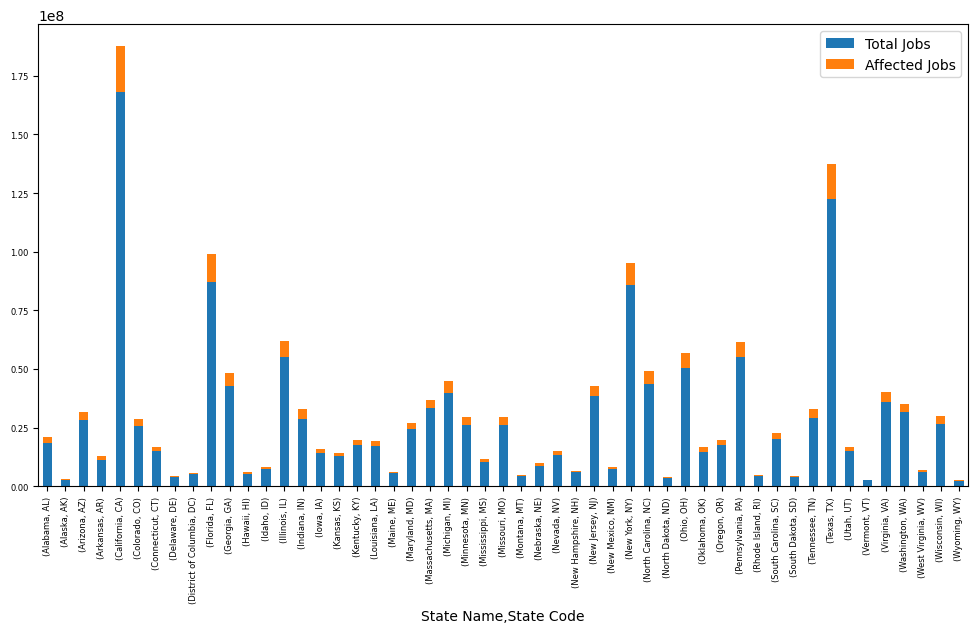

In [45]:
affected_total_merge.plot.bar(stacked=True, fontsize=6, figsize=(12, 6))

In [46]:
affected_total_merge['Percent Impacted'] = affected_total_merge['Affected Jobs']*100/affected_total_merge['Total Jobs']
affected_total_merge.head()

,,Total Jobs,Affected Jobs,Percent Impacted
State Name,State Code,,,
Alabama,AL,18491310,2488550,13.457943
Alaska,AK,2650100,280650,10.590166
Arizona,AZ,28246360,3466580,12.272661
Arkansas,AR,11269720,1431850,12.705285
California,CA,168114330,19521670,11.612139


In [48]:
merged_df["Probable Job Loss"] = merged_df["Total Jobs"]*merged_df["Probability"]
merged_df.head()
probable_job_affected_df.head()

,State Name,2022 National Employment Matrix code,2022 National Employment Matrix title,Total Jobs,State Code,Probability,Probable Jobs Affected
0,Alabama,11-1011,Chief Executives,1400,AL,0.015,21
1,Alaska,11-1011,Chief Executives,1670,AK,0.015,25
2,Arizona,11-1011,Chief Executives,6490,AZ,0.015,97
3,Arkansas,11-1011,Chief Executives,6610,AR,0.015,99
4,California,11-1011,Chief Executives,110890,CA,0.015,1663


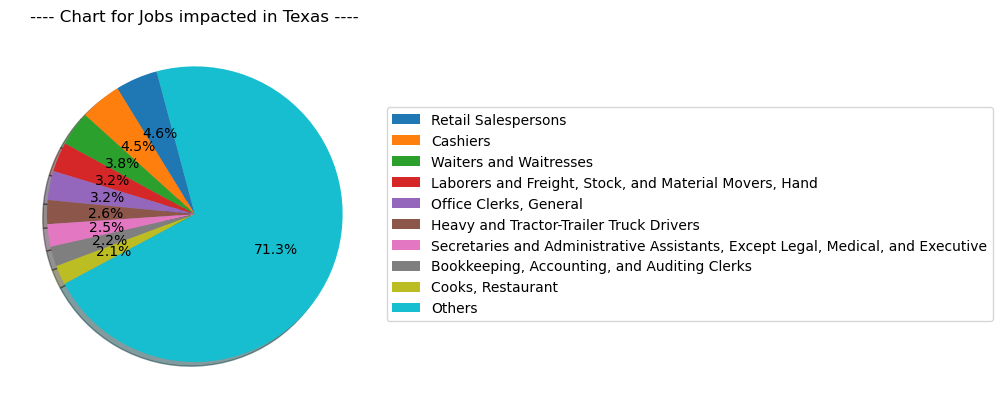

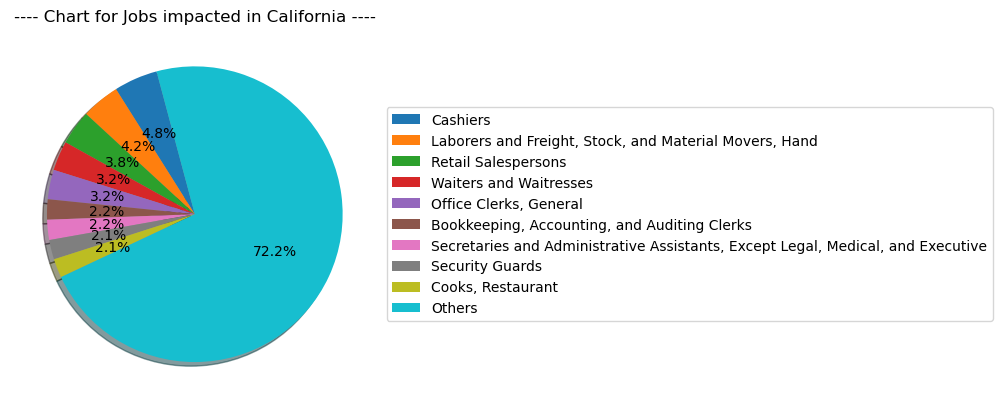

In [91]:
highly_impacted_states = [{'state':'Texas','state_code':'TX'}, {'state':'California','state_code':'CA'}]

for dic in highly_impacted_states:
    
    high_impacted_state_df = probable_job_affected_df.loc[(probable_job_affected_df['Probability'] >= 0.7) 
                                                     & (probable_job_affected_df['State Name'] == dic['state'])]
    filtered_and_sorted_df = high_impacted_state_df.sort_values(by=['Probable Jobs Affected'], ascending = False)

    size = filtered_and_sorted_df.size
    top_9_impacted_jobs = filtered_and_sorted_df.head(9)

    bottom_impacted_jobs = filtered_and_sorted_df.tail(size - 9).groupby(['State Name','State Code']).sum()
    bottom_impacted_jobs_df = {'State Name':dic['state'],'2022 National Employment Matrix code':'', 
                           '2022 National Employment Matrix title':'Others',
                           'Total Jobs':0, 'State Code':dic['state_code'], 'Probability':0,
                           'Probable Jobs Affected': 
                               bottom_impacted_jobs['Probable Jobs Affected'][dic['state']][dic['state_code']]}
    
    ## Plot the pie chart
    plot_data = pd.concat([pd.DataFrame(top_9_impacted_jobs), pd.DataFrame(bottom_impacted_jobs_df, index=[0])], 
                      ignore_index = True)
    plt.pie(plot_data['Probable Jobs Affected'],labeldistance = 1.2, startangle=105, autopct='%1.1f%%', shadow=True)
    plt.legend(plot_data['2022 National Employment Matrix title'], loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('---- Chart for Jobs impacted in ' + dic['state'] + ' ----')
    plt.show()